In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
df = pd.read_csv('Dataset.csv')
df.sort_values(by='Date',inplace=True)
df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
305,20120524,US-Market,donate to haiti,0.0,0.0,0.00,0.00%,0.0,0.00
304,20120524,US-Market,whooping cough,1.0,2.5,599.09,6.60%,9119.0,1498.29
303,20120524,US-Market,vacina h1n1,0.0,0.0,0.00,0.00%,0.0,0.00
302,20120524,US-Market,nfp,0.0,0.0,0.00,0.00%,0.0,0.00


In [55]:
data = df.copy()

In [56]:
data.describe()

,Date,Average.Position,CPC,Clicks,Impressions,Cost
count,3.560540e+05,353018.000000,353018.000000,353018.000000,3.530180e+05,3.530180e+05
mean,2.012269e+07,0.611737,14.285071,439.052699,1.874365e+04,3.598259e+03
std,3.577676e+03,0.643839,37.858433,7559.532663,2.970826e+05,5.718301e+04
min,2.012052e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2.012090e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,2.012102e+07,1.000000,1.100000,2.120000,1.290000e+02,8.070000e+00
75%,2.012122e+07,1.000000,12.100000,35.230000,1.571000e+03,3.749975e+02
max,2.013021e+07,12.000000,632.730000,441963.500000,1.566667e+07,3.269108e+06


In [57]:
data['Date'] = data['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d', errors='ignore'))

In [58]:
date_data = data['Date']

date = pd.DataFrame({'year':date_data.dt.year,
                     'month':date_data.dt.month,
                    'week':date_data.dt.week,
                    'dayofweek':date_data.dt.dayofweek, #date_data.dt.weekday
                    'dayofyear':date_data.dt.dayofyear})

In [59]:
Market = pd.get_dummies(data['Market'],drop_first=True)

In [60]:
train_data = pd.concat([date,Market,data],axis=1)
train_data.head()

,year,month,week,dayofweek,dayofyear,US-Market,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,2012,5,21,3,145,1,2012-05-24,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
305,2012,5,21,3,145,1,2012-05-24,US-Market,donate to haiti,0.0,0.0,0.00,0.00%,0.0,0.00
304,2012,5,21,3,145,1,2012-05-24,US-Market,whooping cough,1.0,2.5,599.09,6.60%,9119.0,1498.29
303,2012,5,21,3,145,1,2012-05-24,US-Market,vacina h1n1,0.0,0.0,0.00,0.00%,0.0,0.00
302,2012,5,21,3,145,1,2012-05-24,US-Market,nfp,0.0,0.0,0.00,0.00%,0.0,0.00


In [61]:
train_data.drop(['Date','Market'],axis=1,inplace=True)

#### The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [62]:
train_data.describe()

,year,month,week,dayofweek,dayofyear,US-Market,Average.Position,CPC,Clicks,Impressions,Cost
count,356054.000000,356054.000000,356054.000000,356054.000000,356054.000000,356054.000000,353018.000000,353018.000000,353018.000000,3.530180e+05,3.530180e+05
mean,2012.187387,8.027819,32.934013,3.007027,229.953263,0.651266,0.611737,14.285071,439.052699,1.874365e+04,3.598259e+03
std,0.390223,3.641304,15.963077,1.962596,111.816529,0.476570,0.643839,37.858433,7559.532663,2.970826e+05,5.718301e+04
min,2012.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2012.000000,7.000000,29.000000,1.000000,204.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,2012.000000,9.000000,37.000000,3.000000,260.000000,1.000000,1.000000,1.100000,2.120000,1.290000e+02,8.070000e+00
75%,2012.000000,11.000000,45.000000,5.000000,315.000000,1.000000,1.000000,12.100000,35.230000,1.571000e+03,3.749975e+02
max,2013.000000,12.000000,52.000000,6.000000,366.000000,1.000000,12.000000,632.730000,441963.500000,1.566667e+07,3.269108e+06


In [79]:
train_data['Clicks'].value_counts()

0.00         150144
0.01            496
0.02            275
0.40            194
0.34            192
0.42            188
0.53            186
0.41            185
0.43            184
0.16            183
0.17            180
0.11            180
0.52            177
0.18            177
0.48            171
0.54            171
0.19            168
0.23            167
0.70            166
1.96            165
0.67            165
1.12            162
0.45            160
1.95            160
0.60            159
0.51            158
1.00            157
2.61            157
0.79            155
0.44            155
              ...  
2410.19           1
253.71            1
253.29            1
370.97            1
746.06            1
5084.35           1
242.07            1
93.50             1
404.75            1
176.64            1
2540.30           1
179.46            1
635.95            1
4380.42           1
8119.22           1
328.59            1
798.04            1
769.96            1
448.30            1


### Histogram plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CE636C400>,
      dtype=object)

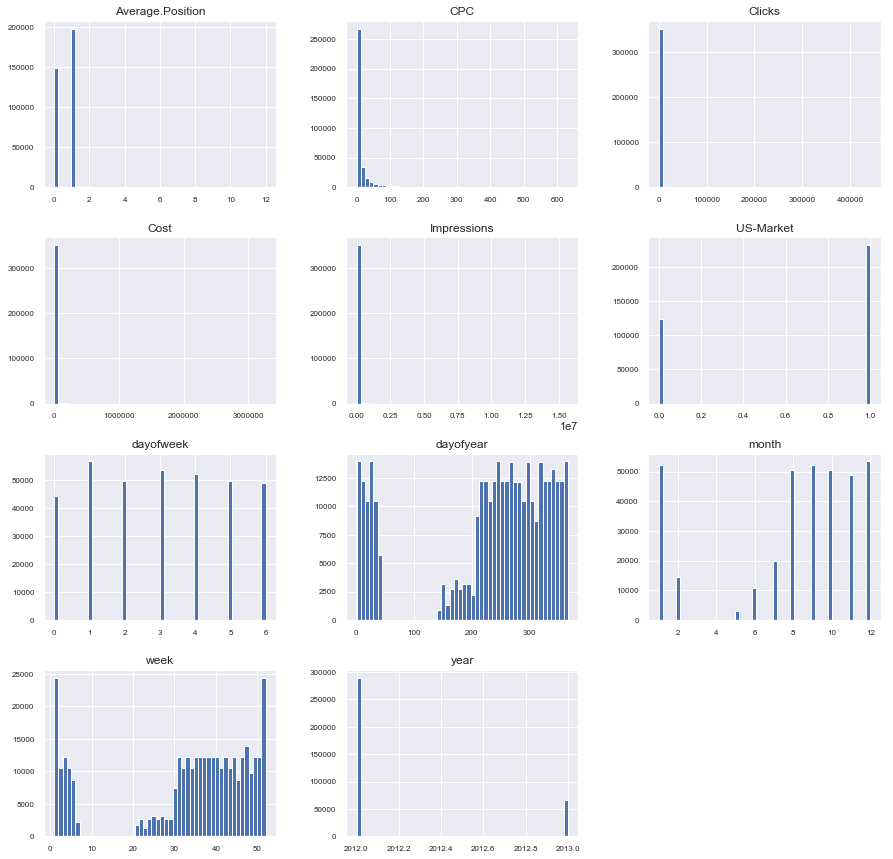

In [83]:
train_data.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8)

### Pair plots

We can see that only cost and impressions have a linear relationship with the clicks

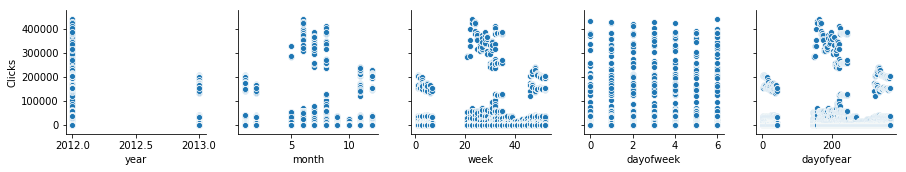

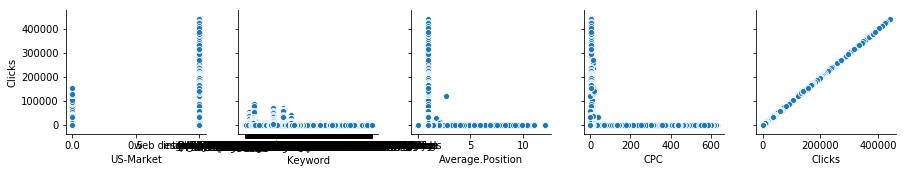

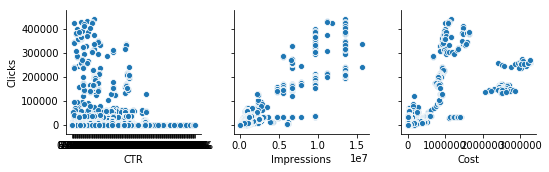

In [64]:
for i in range(0, len(train_data.columns), 5):
    sns.pairplot(data=train_data,
                x_vars=train_data.columns[i:i+5],
                y_vars=['Clicks'])

### Correlation matrix with heatmap

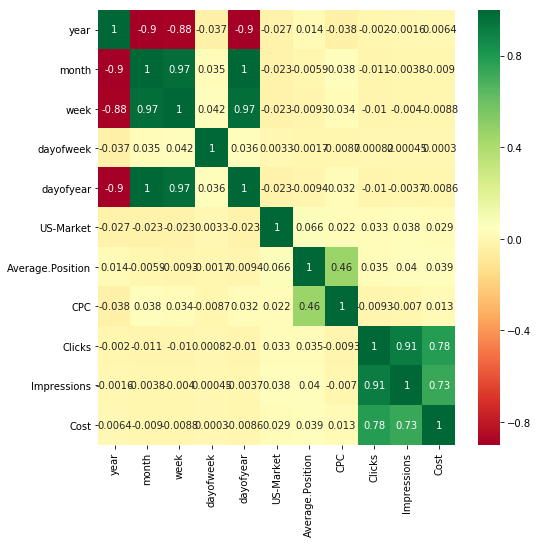

In [68]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [73]:
df_num_corr = train_data.corr()['Clicks']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Clicks:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with Clicks:
Clicks         1.000000
Impressions    0.914375
Cost           0.779799
Name: Clicks, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


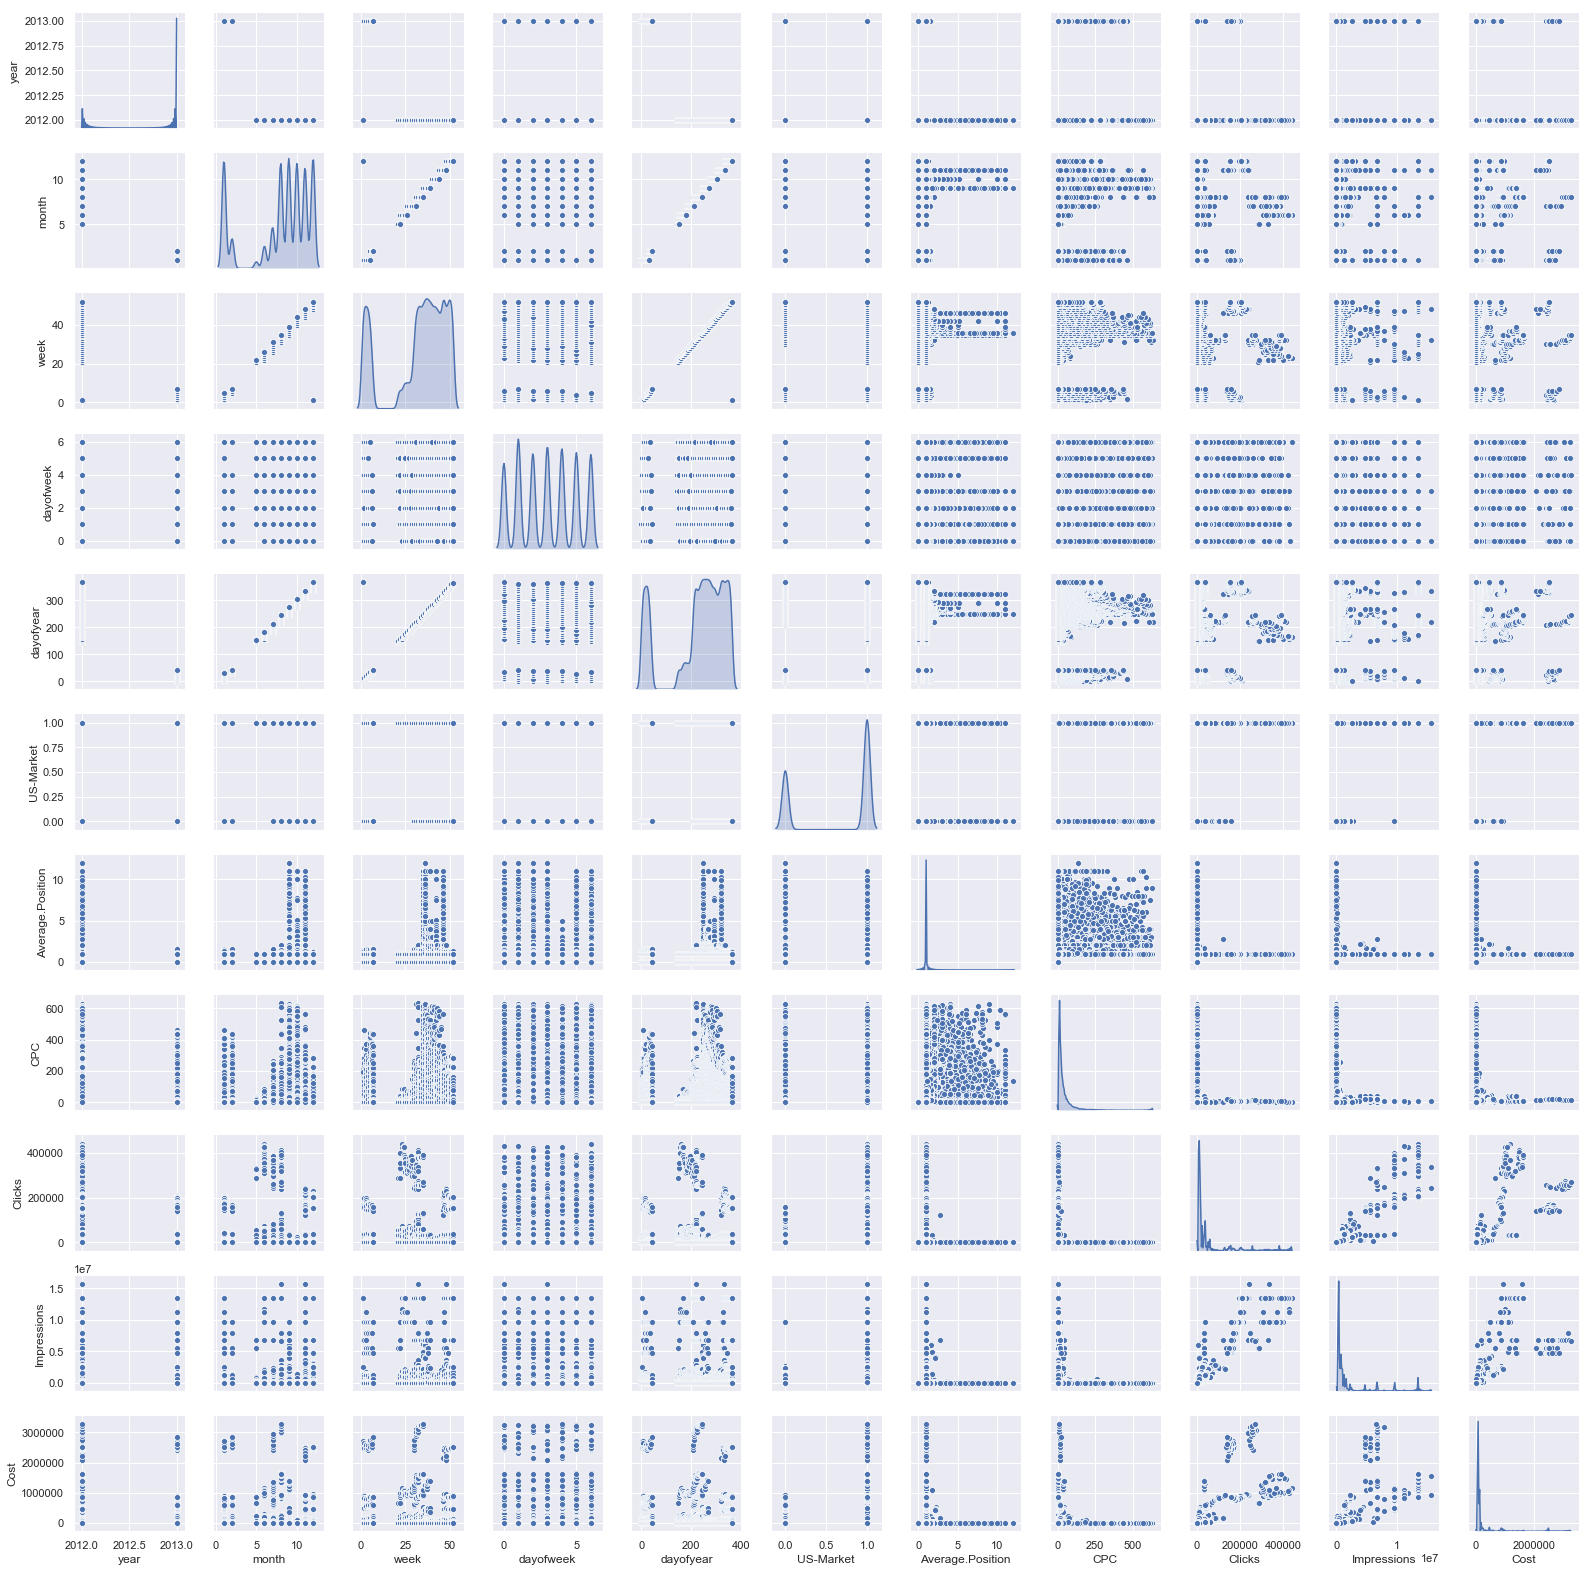

In [74]:
sns.set()
sns.pairplot(train_data[train_data.columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

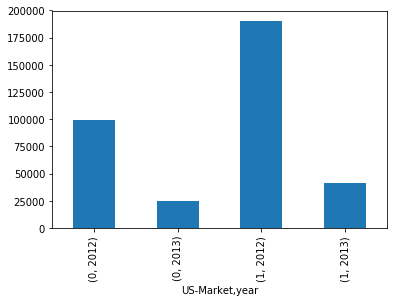

In [19]:
train_data.groupby(['US-Market','year']).size().plot(kind='bar')

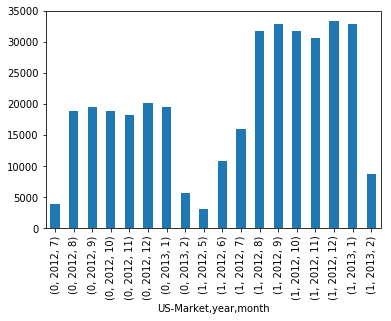

In [20]:
train_data.groupby(['US-Market','year','month']).size().plot(kind='bar')

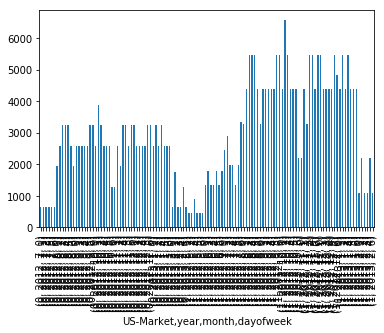

In [22]:
train_data.groupby(['US-Market','year','month','dayofweek']).size().plot(kind='bar')